# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/geo/1.0/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'direct?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_info = requests.get(city_url).json()
        lat = city_info[0]['lat']
        lon = city_info[0]['lon']
        city_weather = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={weather_api_key}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.gmtime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": time.asctime(city_date)})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | giyani
Processing Record 4 of Set 1 | nizao
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | inverell
Processing Record 8 of Set 1 | mhamid
Processing Record 9 of Set 1 | lethem
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | phan rang-thap cham
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | san pedro pochutla
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | polyarnyy
City not found. Skipping...
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | maitum
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | cherdyn'


Processing Record 37 of Set 4 | kayangel
Processing Record 38 of Set 4 | papao
Processing Record 39 of Set 4 | chivacoa
Processing Record 40 of Set 4 | clear lake
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | shache
City not found. Skipping...
Processing Record 43 of Set 4 | keflavik
Processing Record 44 of Set 4 | ponciano arriaga
Processing Record 45 of Set 4 | shalkar
Processing Record 46 of Set 4 | chirilagua
Processing Record 47 of Set 4 | bayanhongor
Processing Record 48 of Set 4 | sarandi del yi
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | san jose del guaviare
Processing Record 1 of Set 5 | sao felix do xingu
Processing Record 2 of Set 5 | wa
Processing Record 3 of Set 5 | montgat
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | satsuma
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | seogwipo
Processing Record 9 of Set 5 | vilyuchinsk
Processing Re

Processing Record 27 of Set 8 | mwanza
Processing Record 28 of Set 8 | emmett
Processing Record 29 of Set 8 | porto novo
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | alta
Processing Record 32 of Set 8 | cozumel
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | oltinko'l
Processing Record 35 of Set 8 | karratha
Processing Record 36 of Set 8 | volkhov
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | tongliao
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | grand falls-windsor
Processing Record 41 of Set 8 | vanino
Processing Record 42 of Set 8 | noblesville
Processing Record 43 of Set 8 | west valley
Processing Record 44 of Set 8 | muzayri'
Processing Record 45 of Set 8 | poretskoye
Processing Record 46 of Set 8 | bahia de kino
Processing Record 47 of Set 8 | sao joao do paraiso
Processing Record 48 of Set 8 | ebon
Processing Record 49 of Set 8 | christchurch
Processing Reco

Processing Record 10 of Set 12 | grootfontein
Processing Record 11 of Set 12 | bani walid
Processing Record 12 of Set 12 | hollabrunn
Processing Record 13 of Set 12 | mahabe
Processing Record 14 of Set 12 | cururupu
Processing Record 15 of Set 12 | gorontalo
Processing Record 16 of Set 12 | chernyshevskiy
Processing Record 17 of Set 12 | sherbakul'
Processing Record 18 of Set 12 | contai
Processing Record 19 of Set 12 | pikeville
Processing Record 20 of Set 12 | yendi
Processing Record 21 of Set 12 | mount hagen
Processing Record 22 of Set 12 | san fernando del valle de catamarca
Processing Record 23 of Set 12 | sao paulo de olivenca
Processing Record 24 of Set 12 | novo aripuana
Processing Record 25 of Set 12 | pacasmayo
Processing Record 26 of Set 12 | bishkul
Processing Record 27 of Set 12 | ugoofaaru
City not found. Skipping...
Processing Record 28 of Set 12 | mermoz boabab
City not found. Skipping...
Processing Record 29 of Set 12 | buka
Processing Record 30 of Set 12 | quang ngai

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-35.2705,174.0805,7.84,92,24,1.89,NZ,Mon Aug 7 17:06:32 2023
1,san patricio,27.9695,-97.7732,37.25,35,1,6.19,US,Mon Aug 7 17:06:33 2023
2,giyani,-23.3153,30.7256,21.07,21,69,2.57,ZA,Mon Aug 7 17:06:33 2023
3,nizao,18.2472,-70.2120,30.99,58,25,7.14,DO,Mon Aug 7 17:06:34 2023
4,dudinka,69.4061,86.1751,17.59,47,43,1.23,RU,Mon Aug 7 17:06:34 2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,7.84,92,24,1.89,NZ,Mon Aug 7 17:06:32 2023
1,san patricio,27.9695,-97.7732,37.25,35,1,6.19,US,Mon Aug 7 17:06:33 2023
2,giyani,-23.3153,30.7256,21.07,21,69,2.57,ZA,Mon Aug 7 17:06:33 2023
3,nizao,18.2472,-70.2120,30.99,58,25,7.14,DO,Mon Aug 7 17:06:34 2023
4,dudinka,69.4061,86.1751,17.59,47,43,1.23,RU,Mon Aug 7 17:06:34 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

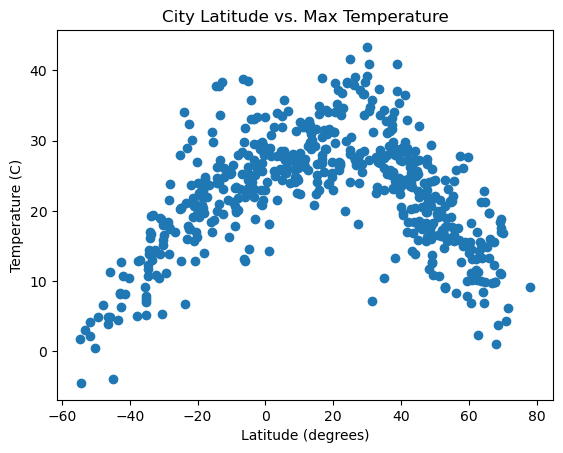

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

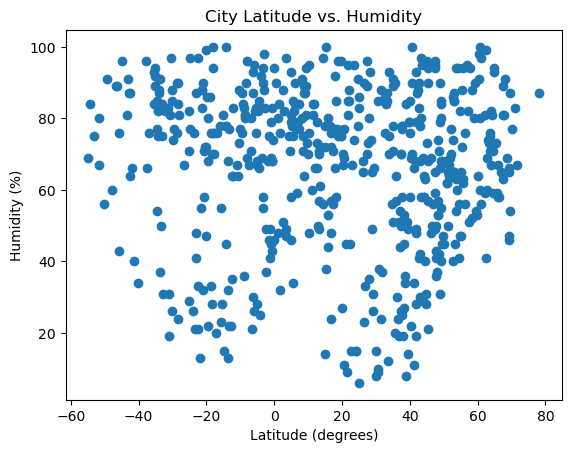

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

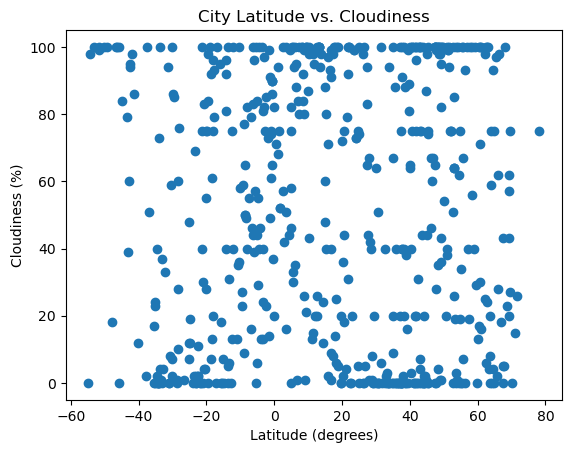

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

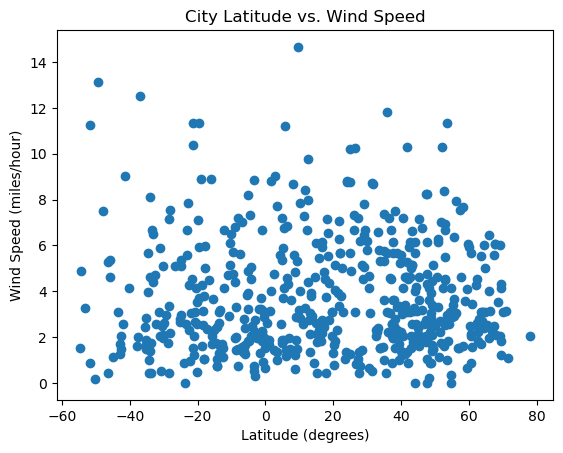

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (miles/hour)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linregressplot(x,y):
    slope, yint, r, p, std_err = linregress(x,y)
    line = slope*x+yint
    
    plt.scatter(x,y)
    plt.plot(x,line,color='r')
    plt.text(x.median(),y=y.median(),s=f'y = {round(slope,2)}x + {round(yint,2)}',color='r')
    plt.title(f'{x.name} vs {y.name}')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.show()
    
    print(f'The correlation between {x.name} and {y.name} is r = {r}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,27.9695,-97.7732,37.25,35,1,6.19,US,Mon Aug 7 17:06:33 2023
3,nizao,18.2472,-70.2120,30.99,58,25,7.14,DO,Mon Aug 7 17:06:34 2023
4,dudinka,69.4061,86.1751,17.59,47,43,1.23,RU,Mon Aug 7 17:06:34 2023
5,gadzhiyevo,69.2504,33.3153,18.42,66,62,6.01,RU,Mon Aug 7 17:06:35 2023
7,mhamid,30.1284,-6.8834,43.33,8,64,5.80,MA,Mon Aug 7 17:06:35 2023


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,7.84,92,24,1.89,NZ,Mon Aug 7 17:06:32 2023
2,giyani,-23.3153,30.7256,21.07,21,69,2.57,ZA,Mon Aug 7 17:06:33 2023
6,inverell,-29.4368,151.1771,11.19,77,85,2.98,AU,Mon Aug 7 17:06:35 2023
9,invercargill,-46.4118,168.3471,3.90,89,100,0.45,NZ,Mon Aug 7 17:06:36 2023
10,ushuaia,-54.8061,-68.3185,1.83,69,0,1.54,AR,Mon Aug 7 17:06:37 2023


###  Temperature vs. Latitude Linear Regression Plot

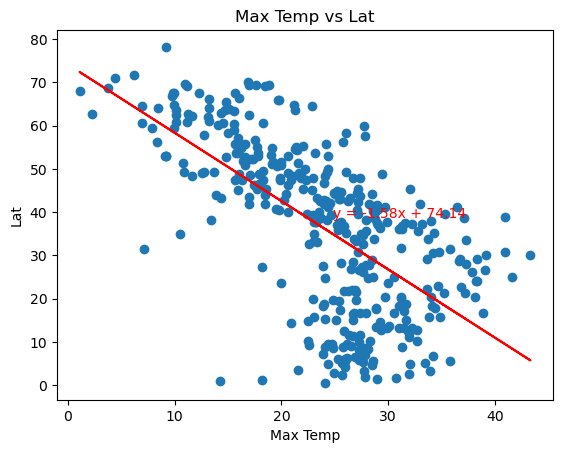

The correlation between Max Temp and Lat is r = -0.6420756828442855


In [32]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])

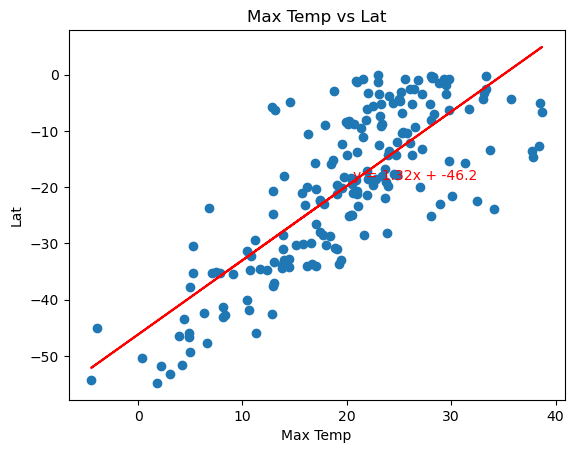

The correlation between Max Temp and Lat is r = 0.7907053032127085


In [16]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is a moderate negative correlation between temperature and latitude in the Northern Hemisphere, while there is a strong positive correlation between the same parameters in the Southern Hemisphere.The trends are clearly linear.

### Humidity vs. Latitude Linear Regression Plot

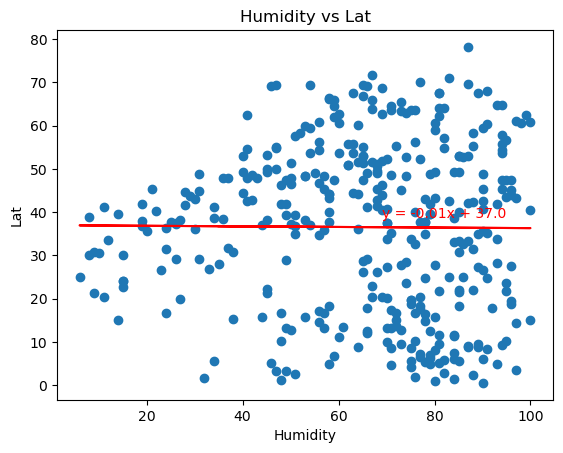

The correlation between Humidity and Lat is r = -0.007890545354762529


In [17]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])

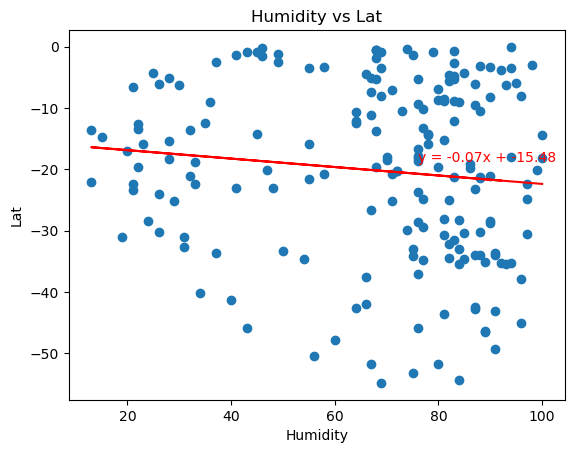

The correlation between Humidity and Lat is r = -0.11230648075381085


In [18]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, though there does appear to be more data in higher-humidity locales. 

### Cloudiness vs. Latitude Linear Regression Plot

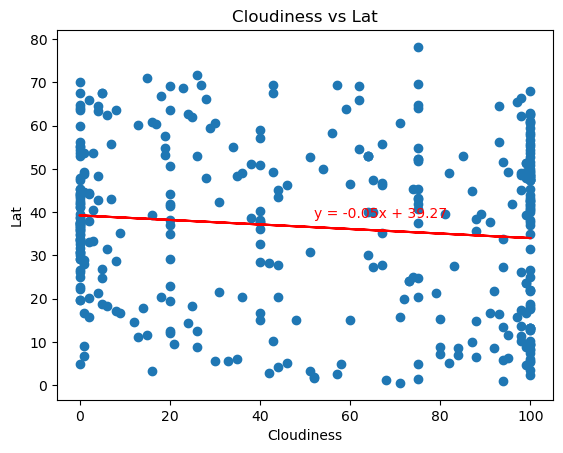

The correlation between Cloudiness and Lat is r = -0.11006215483823142


In [19]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'])

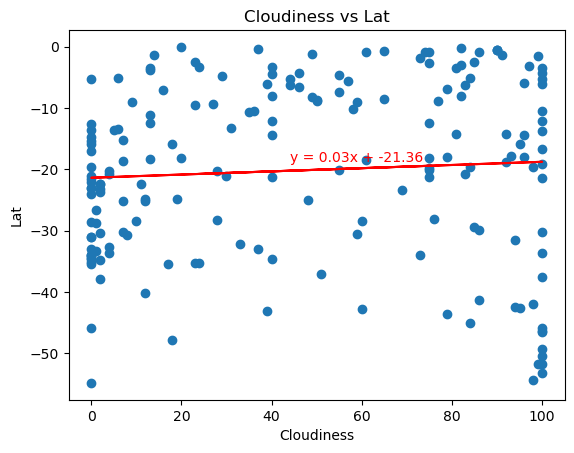

The correlation between Cloudiness and Lat is r = 0.06871333986656313


In [20]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, but there are an abundance of data points with either 0% or 100% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

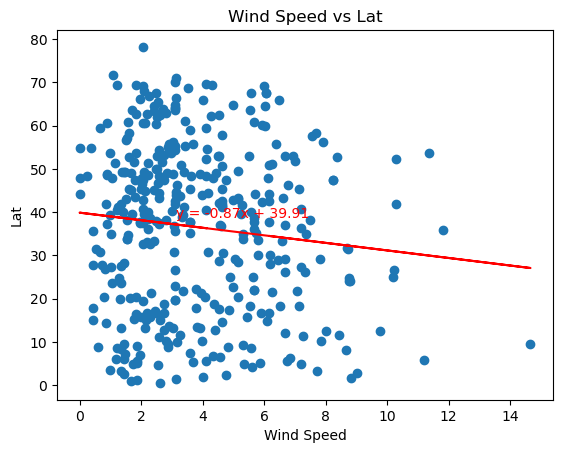

The correlation between Wind Speed and Lat is r = -0.10934204812367186


In [21]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'])

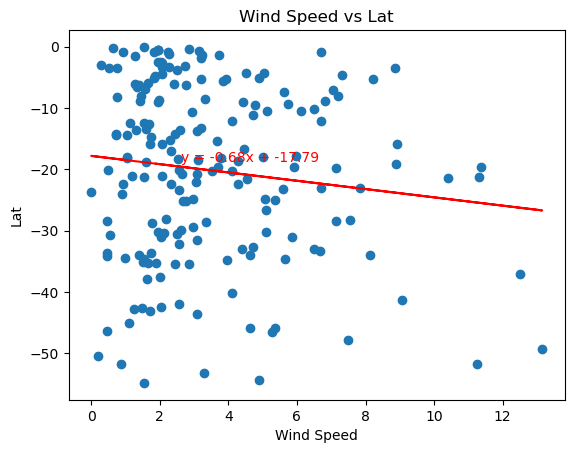

The correlation between Wind Speed and Lat is r = -0.1219076427046395


In [22]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, though there is more data at locales with lower wind speeds.